In [1]:
using Plots, LaTeXStrings
pyplot(markerstrokecolor=false)

Plots.PyPlotBackend()

Primero defino el mapeo de Hénon:

In [2]:
function Henon(x, y, a, b)
    
    1 - a*x^2 + y , b*x
    
end 

Henon (generic function with 1 method)

# Algoritmo para calcular áreas

In [3]:
Henon(0, 0, 1.4, 0.3)

(1.0,0.0)

In [4]:
"""
    condiones_iniciales_2D(f::Function, t_range, a, b)

Función que guarda en un array de de 2×n una parametrización `f` para un rango `t_range`.
Los parámetros `a` y `b` sirven para parametrizaciones que requieran del mapeo de Hénon.

"""

function condiones_iniciales_2D(f::Function, t_range, a, b)
    CI = zeros(2, length(t_range))
    
    for i in 1:length(t_range)
        
        CI[1, i] = f(t_range[i], a, b)[1]
        CI[2, i] = f(t_range[i], a, b)[2]
        
    end
    
    CI
    
end

condiones_iniciales_2D

In [5]:
σ(t, a, b) = (cos(t), sin(t))

σ (generic function with 1 method)

In [6]:
"""
    iterator(f::Function, X0, a, b, N)

Itera un array `X0` usando un mapeo `f`, un número `N` de veces.

"""


function iterator(f::Function, X0, a, b, N)
    
    aux = copy(X0)
    orbit = zeros(size(aux))
    
    for j in 1:N
        
        for i in 1:length(aux[1, :])

            orbit[1, i] = f(aux[1, i], aux[2, i], a, b)[1]
            orbit[2, i] = f(aux[1, i], aux[2, i], a, b)[2]

        end
        
        aux = copy(orbit)
 
    end
    
    orbit
    
end 

iterator

In [25]:
CI1 = condiones_iniciales_2D(σ, 0:0.01:2π, 1.4, 1)

2×629 Array{Float64,2}:
 1.0  0.99995     0.9998     0.99955    …   0.999731    0.999913    0.999995 
 0.0  0.00999983  0.0199987  0.0299955     -0.0231832  -0.0131849  -0.0031853

In [26]:
I3 = iterator(Henon, CI1, 1.4, 0.3, 2)

2×629 Array{Float64,2}:
  1.076   1.0872     1.09837    1.1095    …   1.05009    1.06124    1.07243 
 -0.12   -0.116958  -0.113832  -0.110623     -0.126729  -0.123882  -0.120951


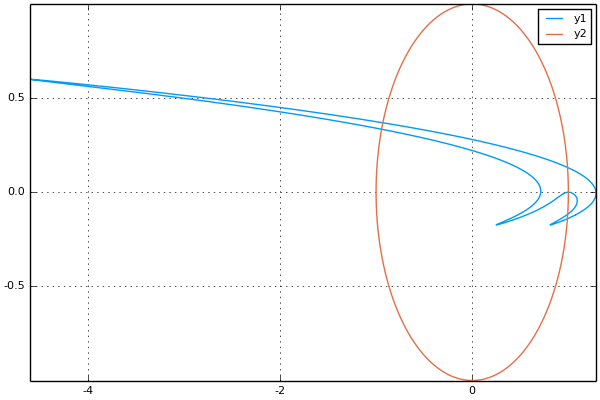

In [27]:
plot(I3[1,:], I3[2,:])
plot!(CI1[1,:], CI1[2,:])

In [9]:
function ξ(t) #parametrización cuadrado.
    t <= 2 && return (t-1, 1)
    t > 2 && t <= 4 && return (1, 3 - t)
    t > 4 && t <= 6 && return (5 - t , -1)
    t > 6 && return (-1, 7 - t)
end

ξ (generic function with 1 method)

In [10]:
t2_rango = 0:0.01:8
CC1 = condiones_iniciales_2D(ξ, t2_rango)
CC2 = iterator(Henon, CC1, 1.4, 0.3, 1)
CC3 = iterator(Henon, CC1, 1.4, 0.3, 2)
plot(CC1[1, :], CC1[2, :])
plot!(CC2[1, :], CC2[2, :])
plot!(CC3[1, :], CC3[2, :])

LoadError: LoadError: MethodError: no method matching condiones_iniciales_2D(::#ξ, ::FloatRange{Float64})
Closest candidates are:
  condiones_iniciales_2D(::Function, ::Any, !Matched::Any, !Matched::Any) at In[4]:10
while loading In[10], in expression starting on line 2

## Primer método (Henon inverso) #nosirve

In [11]:
function Henon_inv(x, y, a, b)
    
    y/b , x + a*(y/b)^2 -1
    
end 

Henon_inv (generic function with 1 method)

In [19]:
CI2

LoadError: LoadError: UndefVarError: CI2 not defined
while loading In[19], in expression starting on line 1

In [20]:
CInv1 = iterator(Henon_inv, CI2, 1.4, 1, 1)

LoadError: LoadError: UndefVarError: CI2 not defined
while loading In[20], in expression starting on line 1

In [21]:
plot(CI2[1, :], CI2[2, :])
plot!(CInv1[1, :], CInv1[2, :])

LoadError: LoadError: UndefVarError: CI2 not defined
while loading In[21], in expression starting on line 1

In [12]:
function randinterval(n, min, max)
    
    rand(n) * (max - min) + min
    
end

randinterval (generic function with 1 method)

In [13]:
function area_henon(N, a, b, n)
    
    dentro = 0
    total = 0
    
    condIn = condiones_iniciales_2D(σ, 0:0.001:2π)
    CH = iterator(Henon, condIn, a, b, n)
    
    x_min = min(CH[1,:]...)
    x_max = max(CH[1,:]...)
    y_min = min(CH[2,:]...) 
    y_max = max(CH[2,:]...)
    
    for i in 1:N
        
        x = random_interval(1, x_min, x_max)[1]
        y = random_interval(1, y_min, y_max)[1]
        
        for i in 1:n
        
            x_n, y_n = Henon_inv(x, y, a, b)
            x =  x_n
            y = y_n
            
        end
        
        r = sqrt(x^2 + y^2)
        
        if r < 1 
            
            dentro += 1
            
        end
        
        total += 1
    end

    dentro
    #area = (x_max - x_min)*(y_max - y_min)
    #area * (dentro/total)
    #dentro/total
end

area_henon (generic function with 1 method)

## Método Inside or Outside

In [14]:
"""
    in_or_out(para, x, y)

Función que evalúa si un punto dado por `x` y `y` está dentro de una figura dada por una parametrización
en forma de un array `para` creado usando la función `condiones_iniciales_2D`.

"""

function in_or_out(para, x, y)
    
    crossings = 0
    
    for i in 1:length(para[1,:])-1
        
        if x < para[1, i] && x < para[1, i+1] || x > para[1, i] && x > para[1, i+1]
            
            nothing
            
        elseif y > para[2,i] && y > para[2, i+1]
            
            nothing
    
        elseif y < para[2,i] && y < para[2, i+1]
            
            if x < para[1, i] && x > para[1, i+1] || x > para[1, i] && x < para[1, i+1]
                
                crossings += 1
                
            end
            
        elseif y > para[2, i] && y < para[2, i+1]
            
            if x > para[1, i] && x < para[1, i+1]
                
                y_c = para[2,i] + (para[2, i+1] - para[2, i])*(x - para[1, i])/(para[1, i+1] - para[1, i])
                
                if y_c > y
                    
                    crossings += 1
                    
                end
                
            end
            
        elseif y < para[2, i] && y > para[2, i+1]
            
            if x < para[1, i] && x > para[1, i+1]
                
                y_c = para[2, i+1] + (para[2, i] - para[2, i+1])*(x - para[1, i+1])/(para[1, i] - para[1, i+1])

                if y_c > y

                    crossings += 1

                end

            end
            
        end
        
    end
    
    if iseven(crossings)
        
        return false
        
    elseif isodd(crossings)
        
        return true
        
    end
    
end

in_or_out

In [23]:
CI1

LoadError: LoadError: UndefVarError: CI1 not defined
while loading In[23], in expression starting on line 1

In [31]:
in_or_out(CI1, .1,.01)

true

In [15]:
"""
    invert_ceil(x)

Es una función que redondea hacia arriba un número positivo `x`, o si el número es negativo, lo redondea
hacia abajo.
"""

function invert_ceil(x)
    
    if x < 0 
        
        x = -ceil(abs(x))
        
    else
        
        x = ceil(x)
        
    end
    
    x
    
end

invert_ceil

In [16]:
"""
    enclosing_square(Param_array)

Es una función que dada una parametrización en forma de array `Param_array` que define una figura, 
calcula las coordenadas de un cuadrado que encierra completamente a esa figura.

"""

function enclosing_square(Param_array)
    
    x_min = invert_ceil(min(Param_array[1,:]...))
    x_max = invert_ceil(max(Param_array[1,:]...))
    y_min = invert_ceil(min(Param_array[2,:]...) )
    y_max = invert_ceil(max(Param_array[2,:]...))
    
    return (x_min, x_max), (y_min, y_max)
    
end

enclosing_square

In [17]:
"""
    find_area(Σ::Function, t_range, N, a, b)

Función que calcula el área de una figura dada por una parametrización Σ, usando el método de 
Monte Carlo para calcular áreas. El rango `t_range`es el rango donde está definida la 
parametrizacion Σ, `N` es el número de puntos que se van a arrrojar para medir el área y los 
parámetros `a` y `b` son para las parametrizaciones de figuras que surgen de iterar el mapeo 
de Hénon. Para que funcione Σ debe tomar por argumentos Σ(t, a, b), aunque a y b no se 
requieran para la parametrización.


"""
function find_area(Σ::Function, t_range, N, a, b)
    
    parametrization = condiones_iniciales_2D(Σ, t_range, a, b)
    
    x_limites, y_limites = enclosing_square(parametrization)
    inside = 0
    total = N
    
    area = (x_limites[end] - x_limites[1]) * (y_limites[end] - y_limites[1])
    
    for i in 1:N
        
        x = randinterval(1, x_limites[1], x_limites[end])[1]
        y = randinterval(1, y_limites[1], y_limites[end])[1]
        
        if in_or_out(parametrization, x, y)
            
            inside += 1
            
        end
    end

    area * inside / total
    
end

find_area

In [19]:
t_rango = 0:0.01:2π

0.0:0.01:6.28

In [35]:
@time area = find_area(σ, t_rango, 1000000, 1.4, -1) #Área del círculo con 1 millon de puntos.

  3.372564 seconds (8.01 M allocations: 5.380 GB, 25.95% gc time)


3.139344

In [26]:
error_area/area*100

28.21713563918261

In [29]:
error_area/area*100

28.21713563918261

In [30]:
0.3*area

0.9419664

In [36]:
function itera_parametrizacion_henon(n)
    
    #1 - a*x^2 + y , b*x
    
    x = "cos(t)"
    y = "sin(t)"

    for i in 1:n

        xi = "1 - a*($x)^2 + ($y)"
        yi = "b*($x)"
        x = xi
        y = yi

    end

    ex = parse(x*" , "*y)
    ex_ret = :( (t, a, b) -> $ex )
    eval(ex_ret)
end 

itera_parametrizacion_henon (generic function with 1 method)

In [37]:
itera_parametrizacion_henon(3)(0, 1.4, 0.3)

(-0.7408864000000001,0.32280000000000003)

## Hénon con $a = 1.4 \ b = 1$  

In [32]:
t_rango = 0:0.001:2π
CI1_1 = condiones_iniciales_2D(σ, t_rango, 1.4, 1, )
CI1_2 = iterator(Henon, CI1_1, 1.4, 1, 1)
CI1_3 = iterator(Henon, CI1_2, 1.4, 1, 1)
CI1_4 = iterator(Henon, CI1_3, 1.4, 1, 1)

2×6284 Array{Float64,2}:
 -3.81585  -3.82041  -3.82498  -3.82954  …  -3.80585  -3.81043  -3.815  
  1.776     1.77712   1.77824   1.77936      1.77355   1.77467   1.77579


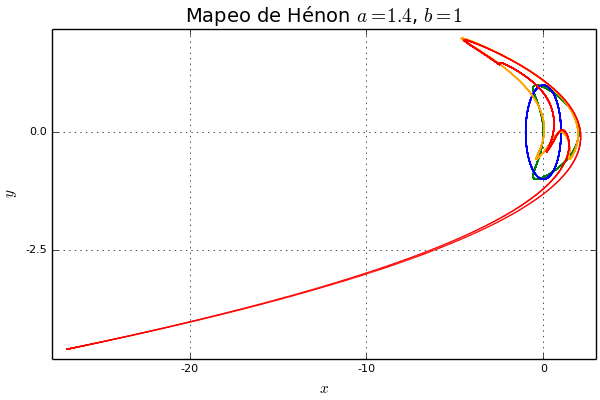

In [33]:
scatter(CI1_2[1,:], CI1_2[2,:], markersize=(1), markercolor=:green, label=("Cond. Iniciales"))
scatter!(CI1_1[1,:], CI1_1[2,:], markersize=(1), markercolor=:blue, label=("Primer iterado"))
scatter!(CI1_3[1,:], CI1_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
scatter!(CI1_4[1,:], CI1_4[2,:], markersize=(1), markercolor=:red, leg=false)
xlabel!(L"x")
ylabel!(L"y")
title!(L"Mapeo de Hénon $a = 1.4$, $b=1$")

- #### Cálculo de áreas

In [34]:
areas_b_1 = Float64[]

for i in 0:4
    
    a = find_area(itera_parametrizacion_henon(i), t_rango, 1000000, 1.4, 1)
    push!(areas_b_1, a)
    
end

areas_b_1

5-element Array{Float64,1}:
 3.14156
 3.14022
 3.14196
 3.13362
 2.70072


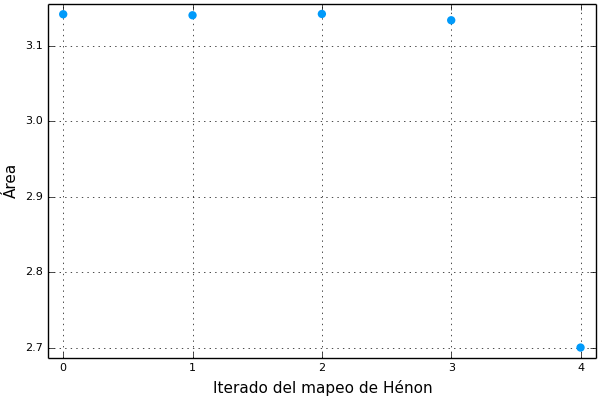

In [35]:
scatter(collect(0:4), areas_b_1, leg = false)
ylabel!("Área")
xlabel!("Iterado del mapeo de Hénon")

In [36]:
find_area(σ, t_rango, 1000000, 1.4, 1) #Círculo, condiciones iniciales.

3.140568

In [37]:
find_area(itera_parametrizacion_henon(1), t_rango, 1000000, 1.4, 1)

3.1389

In [38]:
find_area(itera_parametrizacion_henon(2), t_rango, 1000000, 1.4, 1)

3.137253

In [39]:
find_area(itera_parametrizacion_henon(3), t_rango, 1000000, 1.4, 1)

3.13362

In [40]:
find_area(itera_parametrizacion_henon(4), t_rango, 5000000, 1.4, 1)

3.425004

# Hénon con a = 1.4 , b = -1

In [41]:
t_rango = 0:0.001:2π
CI_1_1 = condiones_iniciales_2D(σ, t_rango)
CI_1_2 = iterator(Henon, CI_1_1, 1.4, -1, 1)
CI_1_3 = iterator(Henon, CI_1_2, 1.4, -1, 1)
CI_1_4 = iterator(Henon, CI_1_3, 1.4, -1, 1)

LoadError: LoadError: MethodError: no method matching condiones_iniciales_2D(::#σ, ::FloatRange{Float64})
Closest candidates are:
  condiones_iniciales_2D(::Function, ::Any, !Matched::Any, !Matched::Any) at In[5]:10
while loading In[41], in expression starting on line 2

In [42]:
scatter(CI_1_1[1,:], CI_1_1[2,:], markersize=(1), markercolor=:blue, label=("Cond. Iniciales"))
scatter!(CI_1_2[1,:], CI_1_2[2,:], markersize=(1), markercolor=:green, label=("Primer iterado"))
scatter!(CI_1_3[1,:], CI_1_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
#scatter!(CI_1_4[1,:], CI_1_4[2,:], markersize=(1), markercolor=:red, leg=false)
title!(L"Mapeo de Hénon $a = 1.4$, $b=-1$")
xlabel!(L"x")
ylabel!(L"y")

LoadError: LoadError: UndefVarError: CI_1_1 not defined
while loading In[42], in expression starting on line 1

- #### Cálculo de áreas

In [43]:
areas_b__1 = Float64[]

for i in 0:4
    
    a = find_area(itera_parametrizacion_henon(i), t_rango, 1000000, 1.4, -1)
    push!(areas_b__1, a)
    
end

areas_b__1

5-element Array{Float64,1}:
  3.1441 
  3.13967
  3.14131
  3.20212
 25.7915 


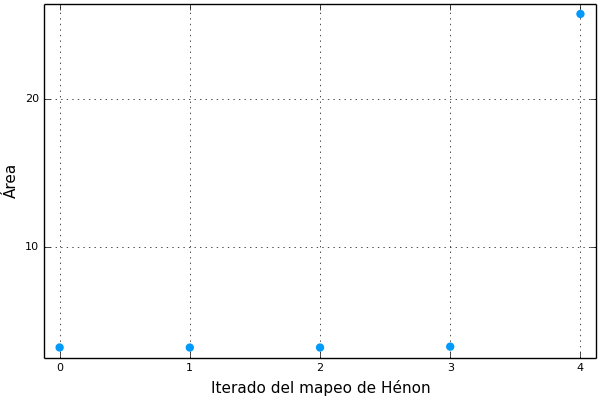

In [44]:
scatter(collect(0:4), areas_b__1, leg = false)
ylabel!("Área")
xlabel!("Iterado del mapeo de Hénon")

## Hénon con $a = 1.4 \ b = 0.3$  

In [45]:
t_rango = 0:0.001:2π
CI03_1 = condiones_iniciales_2D(σ, t_rango)
CI03_2 = iterator(Henon, CI03_1, 1.4, 0.3, 1)
CI03_3 = iterator(Henon, CI03_2, 1.4, 0.3, 1)
CI03_4 = iterator(Henon, CI03_3, 1.4, 0.3, 1)

LoadError: LoadError: MethodError: no method matching condiones_iniciales_2D(::#σ, ::FloatRange{Float64})
Closest candidates are:
  condiones_iniciales_2D(::Function, ::Any, !Matched::Any, !Matched::Any) at In[5]:10
while loading In[45], in expression starting on line 2

In [46]:
scatter(CI03_1[1,:], CI03_1[2,:], markersize=(1), markercolor=:blue, label=("Cond. Iniciales"))
scatter!(CI03_2[1,:], CI03_2[2,:], markersize=(1), markercolor=:green, label=("Primer iterado"))
scatter!(CI03_3[1,:], CI03_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
scatter!(CI03_4[1,:], CI03_4[2,:], markersize=(1), markercolor=:red, leg=false)
title!(L"Mapeo de Hénon $a = 1.4$, $b=0.3$")
xlabel!(L"x")
ylabel!(L"y")

LoadError: LoadError: UndefVarError: CI03_1 not defined
while loading In[46], in expression starting on line 1

- #### Cálculo de áreas

In [47]:
areas_b_03 = Float64[]

for i in 0:5
    
    a = find_area(itera_parametrizacion_henon(i), t_rango, 1000000, 1.4, 0.3)
    push!(areas_b_03, a)
    
end

areas_b_03

6-element Array{Float64,1}:
 3.13994 
 0.940998
 0.281386
 0.08742 
 0.0663  
 0.0     


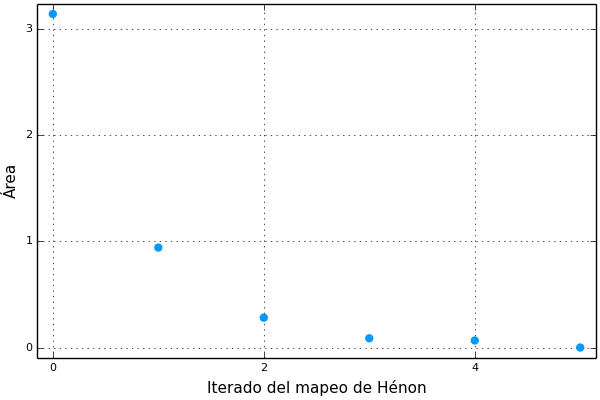

In [48]:
scatter(collect(0:5), areas_b_03, leg = false)
ylabel!("Área")
xlabel!("Iterado del mapeo de Hénon")

## Cálculo de error en método de Monte Carlo

In [49]:
CI1

2×629 Array{Float64,2}:
 1.0  0.99995     0.9998     0.99955    …   0.999731    0.999913    0.999995 
 0.0  0.00999983  0.0199987  0.0299955     -0.0231832  -0.0131849  -0.0031853

In [58]:
"""
    Error_area(θ, t_range, points_number, a, b, N)

Calcula el error de la función `find_area` para una parametrización θ, y un número N de muestras. 
la variable points_number, a, b son variables que se usan en la función `find_area`.
"""

function Error_area(θ, t_range, points_number, a, b, N)
    
    areas = zeros(N)
    
    for i in 1:N
        
        areas[i] = find_area(θ, t_range, points_number, a, b)
        
    end
    
    std(areas)
    
end 

Error_area (generic function with 2 methods)

In [60]:
@time Error_area(σ, t_rango, 100000, 1.4, 1, 100)

 51.753442 seconds (80.76 M allocations: 53.815 GB, 32.71% gc time)


0.004693462532656956

In [61]:
0.004693462532656956 * 100 / π

0.14939755245779215

In [57]:
std(variance)

0.004856495351798521

# Gráficas

In [58]:
"""Función que grafica el conjunto de Julia generado por el mapeo f(z,c), en donde z 
es la variable en el plano complejo y c el parametro que caracteriza al 
sistema dinamico z_{n+1}=f(z_n)

init_cond =  la malla de condiciones iniciales en el plano complejo 

m =  numero limite de iteraciones del mapeo

R= radio del circulo en el plano complejo que se toma como criterio de divergencia

"""
function Julia_set_Henon(a,b,xrange,yrange,maxiter,R)
    
    mx=length(xrange)
    my=length(yrange)
    iterandos=zeros(my,mx) 
    for i in 1:mx
        for j in 1:my
            x=xrange[i]
            y=yrange[my+1-j]
                for k in 1:maxiter
                x,y=Henon(x,y,a,b)
                iterandos[j,i]=k
                    if 
                    sqrt(x^2+y^2)>=R 
                    break
                    end 
                end
        end 
    end
    return iterandos
end

Julia_set_Henon


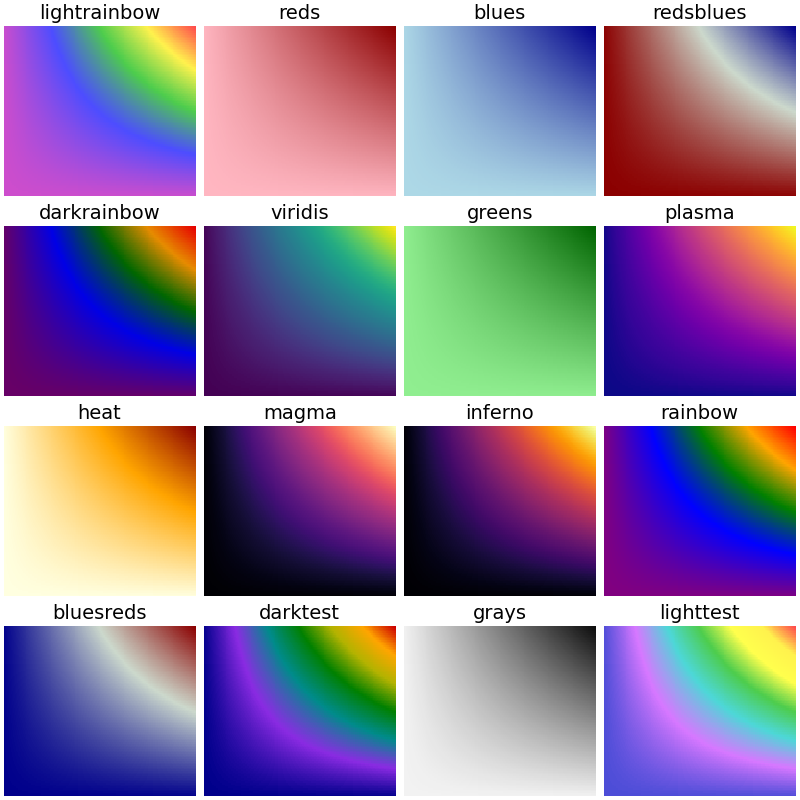

In [53]:
z = (1:100)*(1:200)';
p = plot(layout=length(PlotUtils._gradients), axis=nothing, leg=false, size=(800,800))
for (i,cmap) in enumerate(keys(PlotUtils._gradients))
   heatmap!(p[i], z, fillcolor=cmap, title=string(cmap))
end; p

In [60]:
xrange=-2:1/100:2
yrange=-2:1/100:6
m=80
R=2
a=1.4
b=1

1

In [55]:
function animate_julia_set_Henon(a_range, b, x_range, y_range, m, R, color_gradient::Symbol, tamano)
    
    @animate for i=1:length(a_range)
    
        Ima = Julia_set_Henon(a_range[i], b , x_range, -y_range, m, R)

        heatmap(x_range, y_range, Ima, cbar=false, fillcolor= color_gradient,
        size = tamano, yflip=false, annotations=(1, -3.3, text("a = $(a_range[i])  b = $b", :white)))

    end
end

animate_julia_set_Henon (generic function with 1 method)

In [56]:
henon_gif_02 = animate_julia_set_Henon(ases, 1, xrange, yrange, m, R, :darktest, (400,600))
gif(henon_gif_02, "henon_gif_02.gif", fps = 10)

LoadError: LoadError: UndefVarError: ases not defined
while loading In[56], in expression starting on line 1

In [57]:
henon_gif_01 = animate_julia_set_Henon(-1:0.1:1, -1, xrange, yrange, m, R, :darktest, (400,600))
gif(henon_gif_01, "henon_gif_01.gif", fps = 10)

INFO: Saved animation to /Users/claudiopierard/2017-1_TSFisComp/proys/Fernando_Oscar_Claudio/henon_gif_01.gif


Plots.AnimatedGif("/Users/claudiopierard/2017-1_TSFisComp/proys/Fernando_Oscar_Claudio/henon_gif_01.gif")

In [58]:
ases = 0:0.01:1.7
b = 0.3

xrange=-2:1/100:2
yrange=-4:1/100:4

#henon_03 = @animate for i=1:length(ases)
    
    Ima=Julia_set_Henon(ases[i], b , xrange,-yrange,m,R)
    heatmap(xrange, yrange, Ima, cbar=false, fillcolor= :darktest,
    size = (400, 600), yflip=false, annotations=(1, -3.3, text("a = $(ases[i])  b = $b", :white)))

end

LoadError: LoadError: UndefVarError: i not defined
while loading In[58], in expression starting on line 9

In [59]:
gif(henon_03, "henon03_fps15.gif", fps = 10)

LoadError: LoadError: UndefVarError: henon_03 not defined
while loading In[59], in expression starting on line 1

In [60]:
a_0(b) = -(1-b)^2 /4

a_0 (generic function with 1 method)

In [61]:
a_0(-1)

-1.0

In [83]:
"""función que itera N veces el mapeo de Henon a partir de una condición inicial (x0,y0) 
con parámetros a,b"""
function iter_Henon(x0,y0,a,b,N)
    Henon_ab(x,y)=Henon(x,y,a,b)
    xx=Float64[]
    yy=Float64[]
    push!(xx,x0)
    push!(yy,y0)
    x,y=Henon_ab(x0,y0)
    for i in 1:N
        x,y=Henon_ab(x,y)
        if abs(x)<1e-10
            push!(xx,0.0)
        else
            push!(xx,x)
        end 
        if abs(y)<1e-10
            push!(yy,0.0)
        else
            push!(yy,y)
        end 
    
    end 
    return xx,yy
end

iter_Henon

In [ ]:
atractor_b_menos_1 = @animate for i in -1:0.1:0.5
    
    xx_1, yy_1 = iter_Henon(0.4, -0.4, 1.4, i, 1000000)
    scatter(xx_1, yy_1, markersize = 1, leg = false, grid = false)
    
end


In [143]:
gif(atractor_b_menos_1, "atractor_b_menos_1.gif", fps =5)

INFO: Saved animation to /Users/claudiopierard/2017-1_TSFisComp/proys/Fernando_Oscar_Claudio/atractor_b_menos_1.gif


Plots.AnimatedGif("/Users/claudiopierard/2017-1_TSFisComp/proys/Fernando_Oscar_Claudio/atractor_b_menos_1.gif")

In [138]:
xx_1, yy_1 = iter_Henon(0.4, -0.4, 1.4, 0.3, 100000)

([0.4,0.922074,-0.0775076,1.26821,-1.27496,-0.89526,-0.504573,0.37499,0.651763,0.517784  …  -0.557477,0.290282,0.714788,0.371795,1.02091,-0.347629,1.13709,-0.914451,0.170417,0.685006],[-0.4,0.1128,0.276622,-0.0232523,0.380464,-0.382487,-0.268578,-0.151372,0.112497,0.195529  …  -0.274625,-0.167243,0.0870847,0.214436,0.111538,0.306274,-0.104289,0.341127,-0.274335,0.0511252])


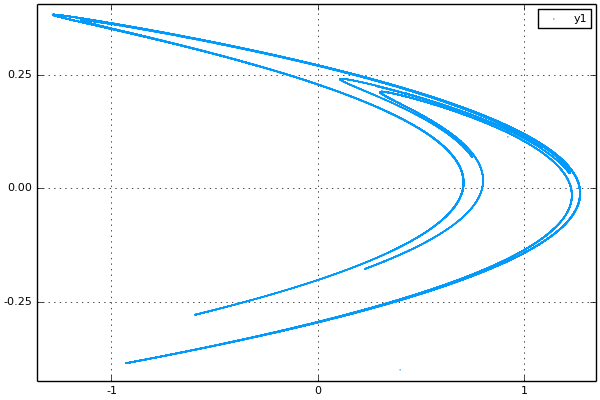

In [139]:
scatter(xx_1, yy_1, markersize = 1)


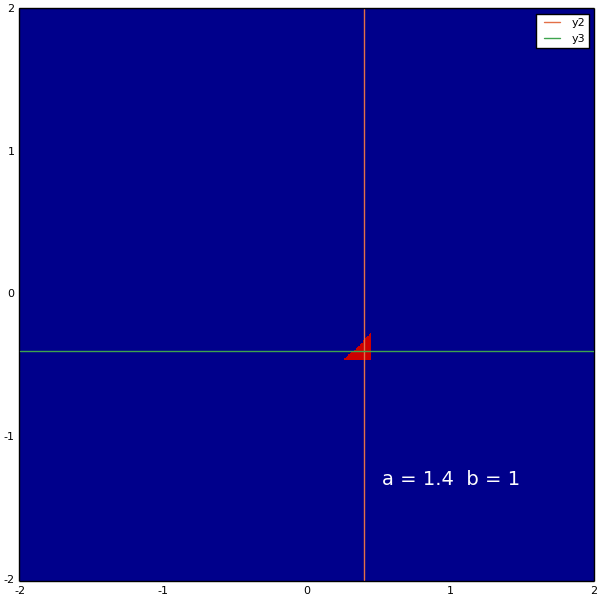

In [107]:
a = 1.4
b = 1
jul_hen_03_m = Julia_set_Henon(a , -1 , -2:0.01:2, 2:-0.01:-2, 100000, 1000)

heatmap(-2:0.01:2, -2:0.01:2, jul_hen_03_m, cbar=false, fillcolor= :darktest,
    size = (600, 600), yflip=false, annotations=(1, -1.3, text("a = $a  b = $b", :white)))
plot!(zeros(-2:2)+0.40, -2:2)
plot!(-2:2, zeros(-2:2)-0.40)

#### Composición de mapeos (mapeo de Hénon)

In [94]:
T′(x, y, a, b) = (x, y + 1 - a*x^2)

T′ (generic function with 2 methods)

In [104]:
T′′(x, y, a, b) = (b*x, y)

T′′ (generic function with 2 methods)

In [110]:
T′′′(x, y, a, b) = (y, x)

T′′′ (generic function with 2 methods)

In [70]:
θ(t, a, b) = (a*cos(t), b*sin(t))

θ (generic function with 2 methods)

In [67]:
t_rango

0.0:0.001:6.283

In [71]:
elipse = condiones_iniciales_2D(θ, t_rango, 2.0, 0.6)

2×6284 Array{Float64,2}:
 2.0  2.0     2.0     1.99999  1.99998     …   2.0           2.0        
 0.0  0.0006  0.0012  0.0018   0.00239999     -0.000711184  -0.000111184

In [111]:
T′_elipse = iterator(T′, elipse, 1.4, 0.3, 1)
T′′_elipse = iterator(T′′, T′_elipse, 1.4, 0.3, 1)
T′′′_elipse = iterator(T′′′, T′′_elipse, 1.4, 0.3, 1)

2×6284 Array{Float64,2}:
 -4.6  -4.59939  -4.59878   -4.59815   …  -4.60128   -4.6007  -4.60011
  0.6   0.6       0.599999   0.599997      0.599999   0.6      0.6    


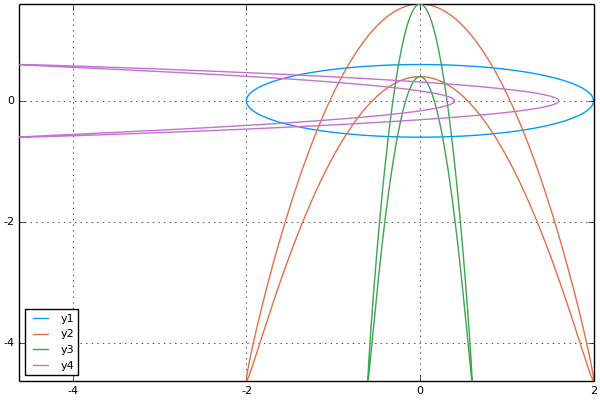

In [112]:
plot(elipse[1,:], elipse[2,:])
plot!(T′_elipse[1,:], T′_elipse[2,:])
plot!(T′′_elipse[1,:], T′′_elipse[2,:])
plot!(T′′′_elipse[1,:], T′′′_elipse[2,:])


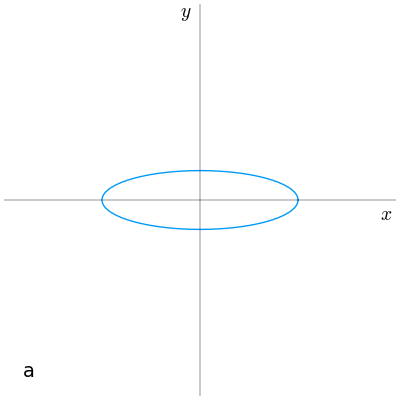

In [137]:
plot(elipse[1,:], elipse[2,:], xlims=(-4,4), ylims=(-4,4), size=(400,400),
annotations=(-0.3, 3.8, text(L"y", :black)), leg= nothing,axis = nothing)
plot!(-4:4, zeros(length(-4:4)), color = :black, annotations=(3.8, -0.3, text(L"x", :black)), linewidth = 0.3)
plot!(zeros(length(-4:4)), -4:4, color = :black, annotations=(-3.5, -3.5, text("a", :black)), linewidth = 0.3)


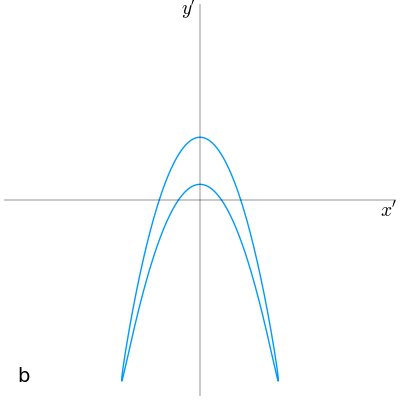

In [139]:
plot(T′_elipse[1,:], T′_elipse[2,:], xlims=(-5,5), ylims=(-5,5), size=(400,400),
annotations=(-0.3, 4.8, text(L"y'", :black)), leg= nothing,axis = nothing)
plot!(-5:5, zeros(length(-5:5)), color = :black, annotations=(4.8, -0.3, text(L"x'", :black)), linewidth = 0.3)
plot!(zeros(length(-5:5)), -5:5, color = :black, annotations=(-4.5, -4.5, text("b", :black)), linewidth = 0.3)


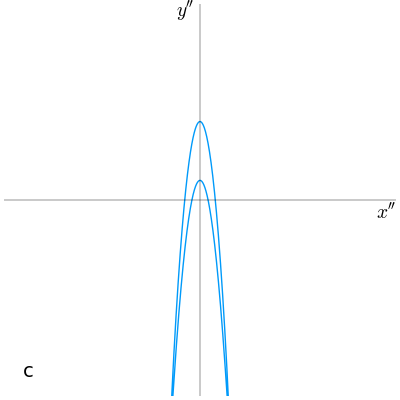

In [145]:
plot(T′′_elipse[1,:], T′′_elipse[2,:], xlims=(-4,4), ylims=(-4,4) , size=(400,400),
annotations=(-0.3, 3.8, text(L"y''", :black)), leg= nothing,axis = nothing)
plot!(-4:4, zeros(length(-4:4)), color = :black, annotations=(3.8, -0.3, text(L"x''", :black)), linewidth = 0.3)
plot!(zeros(length(-4:4)), -4:4, color = :black, annotations=(-3.5, -3.5, text("c", :black)), linewidth = 0.3)


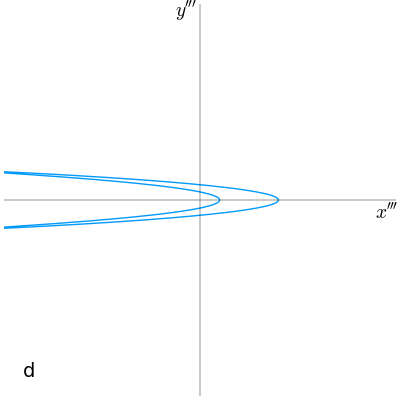

In [148]:
plot(T′′′_elipse[1,:], T′′′_elipse[2,:], xlims=(-4,4), ylims=(-4,4) , size=(400,400),
annotations=(-0.3, 3.8, text(L"y'''", :black)), leg= nothing,axis = nothing)
plot!(-4:4, zeros(length(-4:4)), color = :black, annotations=(3.8, -0.3, text(L"x'''", :black)), linewidth = 0.3)
plot!(zeros(length(-4:4)), -4:4, color = :black, annotations=(-3.5, -3.5, text("d", :black)), linewidth = 0.3)


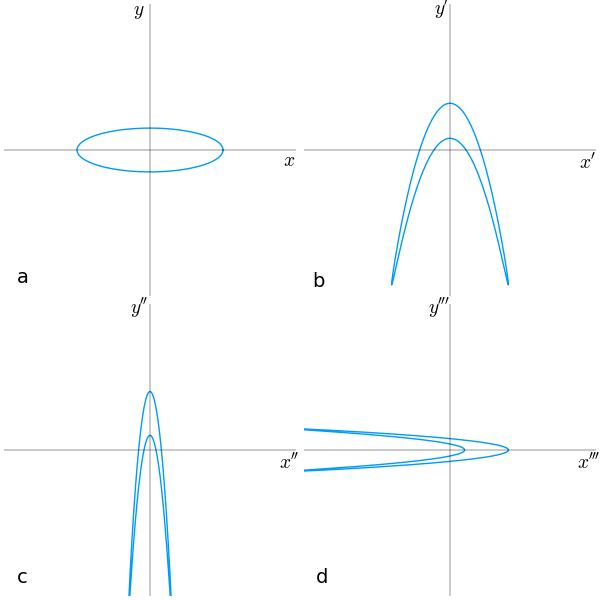

In [162]:
xy_range = -4:4
p = plot(layout=4, leg=false, axis = nothing, size=(600,600))
plot!(p[1], elipse[1,:], elipse[2,:], xlims=(-4,4), ylims=(-4,4),
annotations=(-0.3, 3.8, text(L"y", :black)))
plot!(p[1], -4:4, zeros(length(-4:4)), color = :black, annotations=(3.8, -0.3, text(L"x", :black)), linewidth = 0.3)
plot!(p[1], zeros(length(-4:4)), -4:4, color = :black, annotations=(-3.5, -3.5, text("a", :black)), linewidth = 0.3)

plot!(p[2], T′_elipse[1,:], T′_elipse[2,:], xlims=(-5,5), ylims=(-5,5),
annotations=(-0.3, 4.7, text(L"y'", :black)))
plot!(p[2], -5:5, zeros(length(-5:5)), color = :black, annotations=(4.7, -0.5, text(L"x'", :black)), linewidth = 0.3)
plot!(p[2], zeros(length(-5:5)), -5:5, color = :black, annotations=(-4.5, -4.5, text("b", :black)), linewidth = 0.3)

plot!(p[3], T′′_elipse[1,:], T′′_elipse[2,:], xlims=(-4,4), ylims=(-4,4),
annotations=(-0.3, 3.8, text(L"y''", :black)))
plot!(p[3], -4:4, zeros(length(-4:4)), color = :black, annotations=(3.8, -0.4, text(L"x''", :black)), linewidth = 0.3)
plot!(p[3], zeros(length(-4:4)), -4:4, color = :black, annotations=(-3.5, -3.5, text("c", :black)), linewidth = 0.3)

plot!(p[4], T′′′_elipse[1,:], T′′′_elipse[2,:], xlims=(-4,4), ylims=(-4,4),
annotations=(-0.3, 3.8, text(L"y'''", :black)))
plot!(p[4], -4:4, zeros(length(-4:4)), color = :black, annotations=(3.8, -0.4, text(L"x'''", :black)), linewidth = 0.3)
plot!(p[4], zeros(length(-4:4)), -4:4, color = :black, annotations=(-3.5, -3.5, text("d", :black)), linewidth = 0.3)

## Referencias 
 1. Finding Areas Using the Monte Carlo Method. http://commons.bcit.ca/math/entertainment/inout/index.html
 2. The Inside or Outside Problem. http://commons.bcit.ca/math/entertainment/inout/index.html 